# UNAD

.Hector Julio Hernandez Marin

.prediccion de Arboles de Decisión

.Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el 3 modelo. 5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Interpretar, analizar y documentar los resultados obtenidos.
Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [104]:
# Importamos la librería pandas para el manejo de datos en estructuras tipo DataFrame
import pandas as pd

# Importamos la librería numpy para realizar operaciones numéricas y trabajar con arreglos
import numpy as np

# Importamos seaborn para crear visualizaciones estadísticas atractivas y fáciles de usar
import seaborn as sns

# Importamos matplotlib.pyplot para crear gráficos y visualizaciones en general
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Importamos la submódulo 'metrics' de sklearn para evaluar el rendimiento del modelo
from sklearn import metrics

# Importamos 'train_test_split' para dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importamos 'DecisionTreeClassifier' para crear un modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importamos las métricas de evaluación: precisión, recall y F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
# Mostrar la forma (dimensiones) del DataFrame 'data'.
# Esto devuelve una tupla que contiene el número de filas y columnas,
# lo que ayuda a entender el tamaño del conjunto de datos.
data.shape

(891, 12)

In [61]:
# Mostrar un resumen estadístico de las columnas numéricas en el DataFrame 'data'.
# 'describe()' devuelve métricas como la cuenta, media, desviación estándar, 
# valor mínimo, percentiles (25%, 50%, 75%) y valor máximo para cada columna numérica,
# lo que proporciona una visión general de la distribución y características de los datos.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# Calcular la cantidad de valores nulos (NaN) en cada columna del DataFrame 'data'.
# 'isna()' devuelve un DataFrame booleano que indica la presencia de valores nulos,
# y 'sum()' suma los valores verdaderos (True) para cada columna,
# proporcionando una visión rápida de la calidad de los datos y la necesidad de limpieza.
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

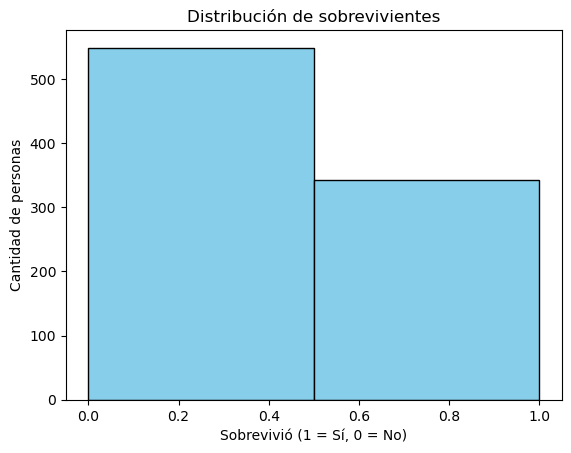

In [116]:
# Crear un histograma de la columna 'Survived' del DataFrame 'data'.
# 'plt.hist()' se utiliza para visualizar la distribución de la variable 'Survived',
# mostrando la frecuencia de cada valor (0 o 1) que indica si una persona sobrevivió.
plt.hist(data['Survived'], bins=2, color='skyblue', edgecolor='black')

# Añadir un título al histograma para clarificar lo que se está mostrando.
plt.title('Distribución de sobrevivientes')

# Añadir etiquetas a los ejes para mayor claridad.
plt.xlabel('Sobrevivió (1 = Sí, 0 = No)')
plt.ylabel('Cantidad de personas')

# Mostrar el histograma en pantalla.
plt.show()

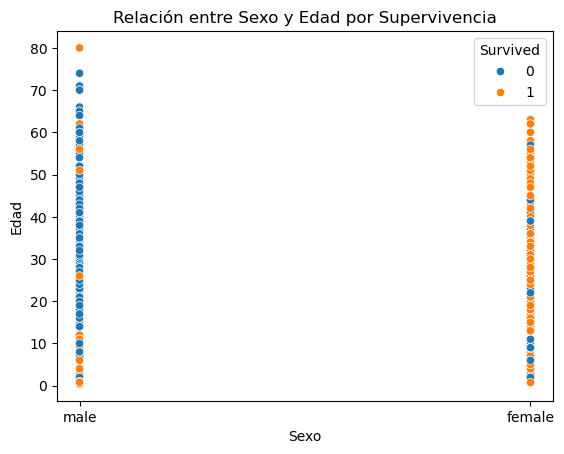

In [118]:
# Crear un diagrama de dispersión utilizando seaborn para visualizar la relación
# entre 'Sex' y 'Age' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'Survived',
# lo que permite observar cómo la supervivencia varía con respecto a las otras dos variables.
sns.scatterplot(x="Sex", y="Age", hue="Survived", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Sexo y Edad por Supervivencia')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Sexo')
plt.ylabel('Edad')

# Mostrar el gráfico en pantalla.
plt.show()

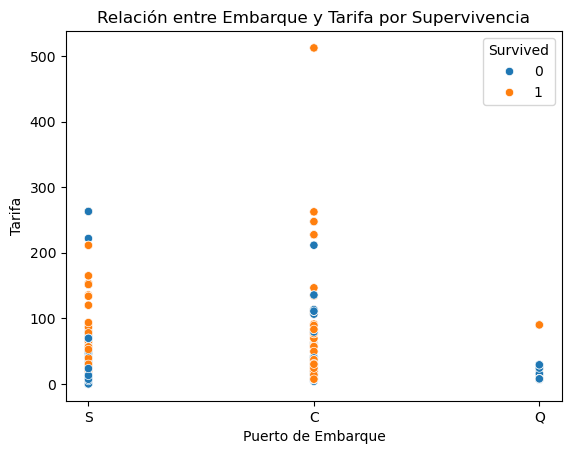

In [79]:
# Crear un diagrama de dispersión utilizando seaborn para visualizar la relación
# entre 'Embarked' y 'Fare' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'Survived',
# lo que permite observar cómo la supervivencia varía con respecto a las otras dos variables.
sns.scatterplot(x="Embarked", y="Fare", hue="Survived", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Embarque y Tarifa por Supervivencia')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tarifa')

# Mostrar el gráfico en pantalla.
plt.show()

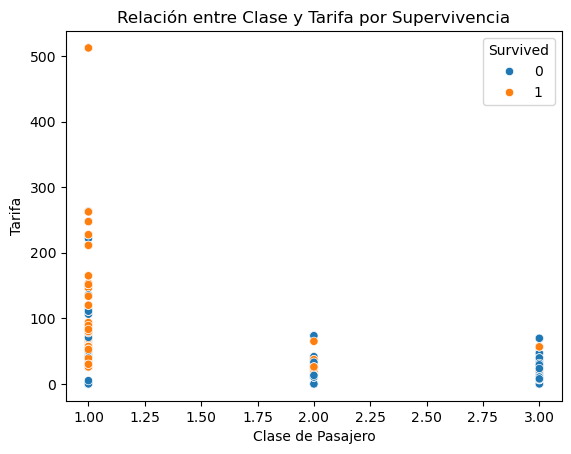

In [120]:

# Crear un diagrama de dispersión utilizando seaborn para visualizar la relación
# entre 'Fare' y 'Pclass' en el DataFrame 'data'.
# El parámetro 'hue' se utiliza para colorear los puntos según la variable 'Survived',
# lo que permite observar cómo la supervivencia varía con respecto a las otras dos variables.
sns.scatterplot(x="Pclass", y="Fare", hue="Survived", data=data)

# Añadir un título al gráfico para mayor claridad.
plt.title('Relación entre Clase y Tarifa por Supervivencia')

# Añadir etiquetas a los ejes para mayor comprensión.
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa')

# Mostrar el gráfico en pantalla.
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [122]:
# Imputación con un modelo de regresión (RandomForestRegressor)
def impute_age_with_regression(data):
    # Variables predictoras (columnas que se usarán para predecir 'Age')
    features = ['Pclass', 'SibSp', 'Parch', 'Fare']
    
    # Filtrar datos con valores completos de 'Age'
    train_data = data[data['Age'].notna()]
    test_data = data[data['Age'].isna()]
    
    # Verificar si hay suficientes datos para hacer la predicción
    if len(train_data) == 0 or len(test_data) == 0:
        print("No hay suficientes datos para la imputación.")
        return data
    
    # Definir variables predictoras y variable objetivo
    X_train = train_data[features]
    y_train = train_data['Age']
    
    # Entrenar el modelo de RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predecir las edades faltantes en los datos de prueba
    X_test = test_data[features]
    predicted_ages = model.predict(X_test)
    
    # Imputar las edades faltantes con las predicciones
    data.loc[data['Age'].isna(), 'Age'] = predicted_ages
    
    return data

# Llamar a la función para imputar los valores faltantes de 'Age'
data = impute_age_with_regression(data)

# Mostrar el número de valores faltantes en la columna 'Age' después de la imputación
print(f'Valores faltantes en Age después de imputación: {data["Age"].isna().sum()}')

# Mostrar las primeras filas para verificar que se ha imputado correctamente
print(data.head())

Valores faltantes en Age después de imputación: 0
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4    

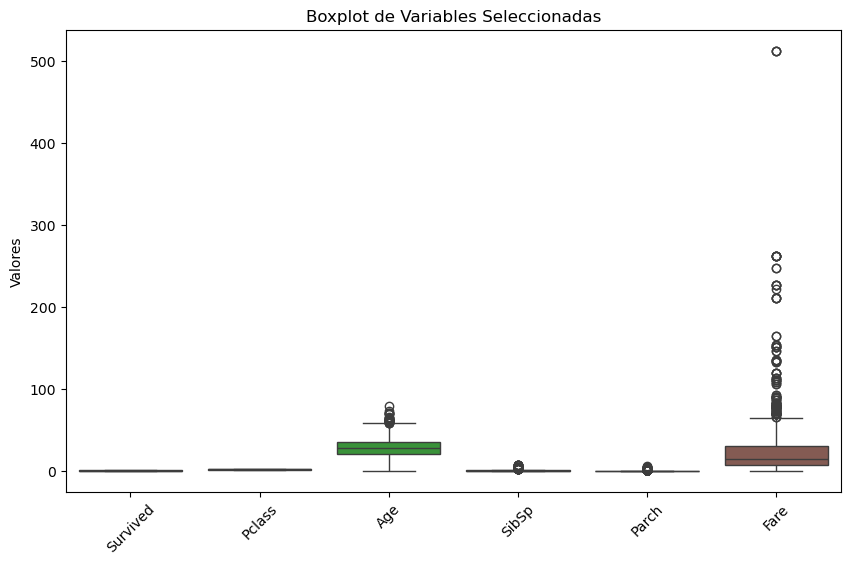

In [128]:
# Crear una figura de tamaño 10x6 pulgadas para el gráfico
plt.figure(figsize=(10, 6))

# Generar un boxplot de las columnas seleccionadas de la variable 'data'
# Seleccionamos solo las columnas numéricas
sns.boxplot(data=data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

# Rotar las etiquetas del eje X 45 grados para evitar que se superpongan, 
# mejorando la legibilidad de los nombres de las variables
plt.xticks(rotation=45)

# Asignar un título al gráfico
plt.title('Boxplot de Variables Seleccionadas')

# Etiquetar el eje Y como 'Valores' para mostrar que representa los valores numéricos de cada variable
plt.ylabel('Valores')

# Mostrar el gráfico en pantalla
plt.show()

In [130]:
# Calcular la media y la desviación estándar de la columna 'Fare'
media = data['Fare'].mean()
desviacion = data['Fare'].std()

# Calcular el rango superior e inferior usando 1.96 veces la desviación estándar
Rsuperior = media + desviacion * 1.96
Rinferior = media - desviacion * 1.96

# Crear una copia del DataFrame original para trabajar con ella
copydata = data.copy()

# Eliminar valores atípicos: aquellos que están por encima del límite superior
copydata = copydata.drop(copydata[copydata['Fare'] > Rsuperior].index)

# Eliminar valores atípicos: aquellos que están por debajo del límite inferior
copydata = copydata.drop(copydata[copydata['Fare'] < Rinferior].index)

# Mostrar el DataFrame sin los valores atípicos
copydata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  853 non-null    int64  
 1   Survived     853 non-null    int64  
 2   Pclass       853 non-null    int64  
 3   Name         853 non-null    object 
 4   Sex          853 non-null    object 
 5   Age          853 non-null    float64
 6   SibSp        853 non-null    int64  
 7   Parch        853 non-null    int64  
 8   Ticket       853 non-null    object 
 9   Fare         853 non-null    float64
 10  Cabin        174 non-null    object 
 11  Embarked     851 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.6+ KB


In [132]:
# Mostrar la forma (dimensiones) del DataFrame 'copydata'.
# Esto devuelve una tupla que contiene el número de filas y columnas,
# lo que ayuda a entender el tamaño del conjunto de datos.
copydata.shape

(853, 12)

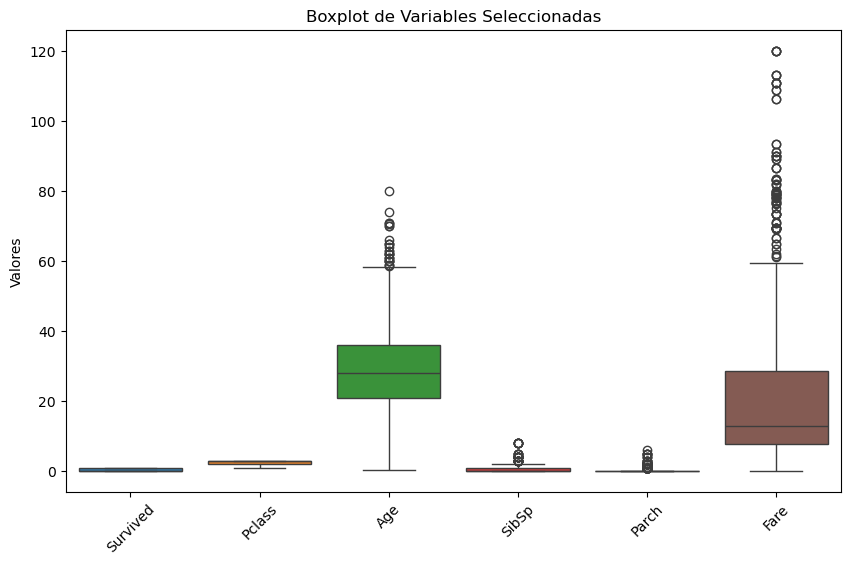

In [134]:
# Crear una figura de tamaño 10x6 pulgadas para el gráfico
plt.figure(figsize=(10, 6))

# Generar un boxplot de las columnas seleccionadas de la variable 'copydata'
# Seleccionamos solo las columnas numéricas
sns.boxplot(data=copydata[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

# Rotar las etiquetas del eje X 45 grados para evitar que se superpongan, 
# mejorando la legibilidad de los nombres de las variables
plt.xticks(rotation=45)

# Asignar un título al gráfico
plt.title('Boxplot de Variables Seleccionadas')

# Etiquetar el eje Y como 'Valores' para mostrar que representa los valores numéricos de cada variable
plt.ylabel('Valores')

# Mostrar el gráfico en pantalla
plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [143]:
# Definir las columnas que se utilizarán como variables predictoras en el modelo.
# Estas columnas contienen características químicas y físicas que pueden ayudar a
# predecir la calidad del vino.
predictors_col = ['Pclass','Sex','Age', 'SibSp', 
                       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

# Definir la columna objetivo que se desea predecir.
# En este caso, es la calidad del vino, que es la variable dependiente.
target_col = ['Survived']

In [147]:
# Crear un DataFrame 'predictors' que contiene solo las columnas especificadas en 'predictors_col'
# de la variable 'copydata'. Estas columnas actuarán como las variables independientes (X) en el modelo.
predictors = copydata[predictors_col]

# Crear un DataFrame 'target' que contiene solo la columna especificada en 'target_col'
# de la variable 'copydata'. Esta columna será la variable dependiente (y) que queremos predecir.
target = copydata[target_col]

In [174]:
# Almacena las columnas seleccionadas en 'predictors_col' de 'copydata'
# en la variable 'predictors', para usarlas como las variables independientes.
predictors

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0000,1,0,7.2500,1,2
1,1,38.0000,1,0,71.2833,0,0
2,3,26.0000,0,0,7.9250,0,2
3,1,35.0000,1,0,53.1000,0,2
4,3,35.0000,0,0,8.0500,1,2
...,...,...,...,...,...,...,...
886,2,27.0000,0,0,13.0000,1,2
887,1,19.0000,0,0,30.0000,0,2
888,3,15.9385,1,2,23.4500,0,2
889,1,26.0000,0,0,30.0000,1,0


In [178]:
# Almacena la columna especificada en 'target_col' de 'copydata'
# en la variable 'target', que representa la variable dependiente que se desea predecir.
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [180]:
# Primero, selecciona las columnas numéricas que puedes usar para la correlación
predictors = copydata[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Convertir las columnas categóricas a numéricas (como 'Sex' y 'Embarked') usando LabelEncoder
label_encoder = LabelEncoder()

# Codificar la columna 'Sex'
copydata['Sex'] = label_encoder.fit_transform(copydata['Sex'])

# Codificar la columna 'Embarked' (asegurando que no haya valores nulos primero)
copydata['Embarked'] = copydata['Embarked'].fillna('S')  # Llenar valores faltantes si hay alguno
copydata['Embarked'] = label_encoder.fit_transform(copydata['Embarked'])

# Ahora puedes agregar las columnas codificadas a 'predictors'
predictors = copydata[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]

# Calcular la matriz de correlación
corr = predictors.corr()

# Mostrar la matriz de correlación calculada
print(corr)

            Pclass       Age     SibSp     Parch      Fare       Sex  Embarked
Pclass    1.000000 -0.411418  0.096813  0.066915 -0.656740  0.091282  0.132258
Age      -0.411418  1.000000 -0.321176 -0.229256  0.121138  0.115916 -0.013444
SibSp     0.096813 -0.321176  1.000000  0.413336  0.309523 -0.115724  0.063347
Parch     0.066915 -0.229256  0.413336  1.000000  0.243559 -0.252093  0.039677
Fare     -0.656740  0.121138  0.309523  0.243559  1.000000 -0.194387 -0.196829
Sex       0.091282  0.115916 -0.115724 -0.252093 -0.194387  1.000000  0.098430
Embarked  0.132258 -0.013444  0.063347  0.039677 -0.196829  0.098430  1.000000


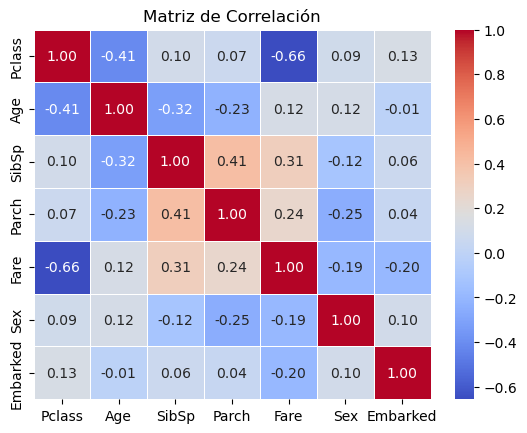

In [182]:
# Crear un mapa de calor (heatmap) de la matriz de correlación 'corr' usando seaborn.
# Esto proporciona una representación visual de las correlaciones entre las variables
# en 'predictors', donde los colores indican la fuerza y dirección de las relaciones.
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Añadir un título al mapa de calor.
plt.title('Matriz de Correlación')

# Mostrar el gráfico en pantalla.
plt.show()

# 5. Entrenar el modelo configurando los diferentes hiperparametro

In [185]:
# Dividir los datos en conjuntos de entrenamiento y prueba.
# Se usa 'train_test_split' para dividir 'predictors' y 'target' en conjuntos de entrenamiento y prueba.
# 'test_size=0.2' asigna el 20% de los datos al conjunto de prueba y el 80% al de entrenamiento.
# 'random_state=13' asegura que la división sea reproducible.
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [187]:
# Crear una instancia del clasificador de árbol de decisión.
# 'DecisionTreeClassifier' es un modelo de aprendizaje supervisado que se utilizará
# para clasificar los datos basándose en las características proporcionadas en 'X_train'.
tree = DecisionTreeClassifier()

In [189]:
# Ajustar el modelo de árbol de decisión a los datos de entrenamiento.
# 'fit' entrena el clasificador usando las características de 'X_train' y las etiquetas de 'y_train'.
arbol = tree.fit(X_train, y_train)

[Text(0.47162828947368424, 0.9722222222222222, 'x[5] <= 0.5\ngini = 0.467\nsamples = 682\nvalue = [428, 254]'),
 Text(0.18969298245614036, 0.9166666666666666, 'x[0] <= 2.5\ngini = 0.39\nsamples = 234\nvalue = [62, 172]'),
 Text(0.10526315789473684, 0.8611111111111112, 'x[4] <= 28.856\ngini = 0.111\nsamples = 119\nvalue = [7, 112]'),
 Text(0.09649122807017543, 0.8055555555555556, 'x[4] <= 28.231\ngini = 0.215\nsamples = 57\nvalue = [7, 50]'),
 Text(0.08771929824561403, 0.75, 'x[1] <= 56.0\ngini = 0.191\nsamples = 56\nvalue = [6, 50]'),
 Text(0.06140350877192982, 0.6944444444444444, 'x[2] <= 0.5\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(0.03508771929824561, 0.6388888888888888, 'x[4] <= 13.25\ngini = 0.1\nsamples = 38\nvalue = [2, 36]'),
 Text(0.02631578947368421, 0.5833333333333334, 'x[4] <= 12.825\ngini = 0.172\nsamples = 21\nvalue = [2, 19]'),
 Text(0.017543859649122806, 0.5277777777777778, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.03508771929824561, 0.52777777777

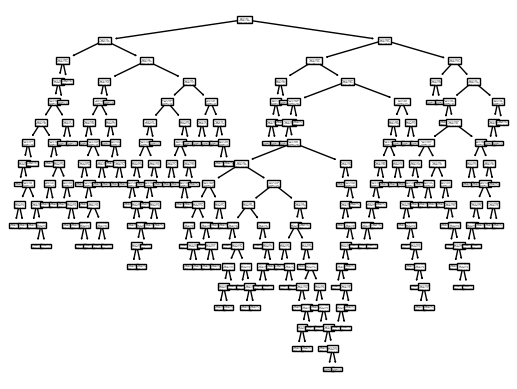

In [191]:
# Visualizar el árbol de decisión ajustado utilizando la función 'plot_tree'.
# Esto muestra la estructura del árbol, incluyendo nodos de decisión y hojas,
# facilitando la comprensión de cómo se toman las decisiones en el modelo.
plot_tree(arbol)

In [193]:
# Realizar predicciones utilizando el modelo de árbol de decisión ajustado.
# 'predict' genera las etiquetas de clase para el conjunto de prueba 'X_test',
# basándose en el aprendizaje del modelo durante el ajuste.
predicciones = arbol.predict(X_test)

In [195]:
# Mostrar las predicciones generadas por el modelo de árbol de decisión
# para el conjunto de prueba 'X_test'. Esta variable contiene las clases
# predichas para cada instancia en el conjunto de prueba.
predicciones

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [198]:
# Crear una tabla de contingencia (crosstab) para comparar las etiquetas reales con las predicciones.
# 'np.array([y[0] for y in y_test.values.tolist()])' convierte las etiquetas reales del conjunto de prueba
# en un arreglo numpy. La tabla muestra la frecuencia de las clases reales (Actual) frente a las predicciones.
# Esto ayuda a evaluar el rendimiento del modelo.
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, 
            rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,83,28
1,18,42


In [200]:
# Calcular la precisión del modelo utilizando la función 'accuracy_score'.
# Esta función compara las etiquetas reales del conjunto de prueba 'y_test' 
# con las predicciones generadas y devuelve la proporción de predicciones correctas.
accuracy = accuracy_score(y_test, predicciones)

# Mostrar el valor de precisión calculado.
accuracy

0.7309941520467836

In [202]:
# Calcular la precisión del modelo utilizando la función 'precision_score'.
# La precisión se refiere a la proporción de verdaderos positivos sobre la suma de verdaderos positivos
# y falsos positivos. Se utiliza 'average='weighted'' para calcular la precisión ponderada,
# considerando el soporte de cada clase (es decir, el número de verdaderas instancias de cada clase).
precision = precision_score(y_test, predicciones, average='weighted')

# Mostrar el valor de precisión calculado.
precision

0.7439638700712176

In [204]:
# Calcular el recall del modelo utilizando la función 'recall_score'.
# El recall, también conocido como sensibilidad, es la proporción de verdaderos positivos
# sobre la suma de verdaderos positivos y falsos negativos. Se utiliza 'average='weighted''
# para calcular el recall ponderado, considerando el soporte de cada clase.
recall = recall_score(y_test, predicciones, average='weighted')

# Mostrar el valor de recall calculado.
recall

0.7309941520467836

In [206]:
# Calcular la puntuación F1 del modelo utilizando la función 'f1_score'.
# La puntuación F1 es la media armónica de la precisión y el recall, 
# proporcionando una única métrica que considera tanto los falsos positivos como los falsos negativos.
# Se utiliza 'average='weighted'' para calcular la puntuación F1 ponderada, 
# considerando el soporte de cada clase.
f1 = f1_score(y_test, predicciones, average='weighted')

# Mostrar el valor de la puntuación F1 calculada.
f1

0.7349960532681487

# 7. Interpretar, analizar y documentar los resultados obtenidos.

interpretación de resultados
1. Accuracy Score: 0.7309941520467836

Interpretación: El modelo tiene una precisión del 73.1%, lo que significa que el modelo acierta en aproximadamente el 73.1% de todas las predicciones, es decir, de cada 100 pasajeros, el modelo predice correctamente si sobrevivieron o no en 73 ocasiones. Este valor es relativamente alto, lo que sugiere que el modelo tiene un desempeño decente para predecir correctamente los resultados de supervivencia.

Implicaciones: Aunque este valor es satisfactorio en muchos contextos, podría mejorar con un modelo más optimizado o utilizando más datos de entrenamiento. Sin embargo, en muchos problemas de clasificación, especialmente cuando hay clases desbalanceadas, un buen valor de accuracy por sí solo no siempre refleja completamente el desempeño del modelo.

2. Precision Score: 0.7439638700712176

Interpretación: La precisión es del 74.4%, lo que indica que, de todas las veces que el modelo predijo que un pasajero sobreviviría, el 74.4% de esas predicciones fueron correctas. Es decir, entre todos los pasajeros que el modelo clasificó como sobrevivientes, el 74.4% realmente sobrevivieron.

Implicaciones: Este valor es bastante alto, lo que indica que el modelo hace un buen trabajo en evitar los falsos positivos (es decir, predecir que un pasajero sobrevivió cuando realmente no lo hizo). Esto es importante en un contexto donde se prefiere minimizar los falsos positivos (por ejemplo, si se estuviera tratando de predecir la supervivencia en un escenario de rescate).

3. Recall Score: 0.7309941520467836

Interpretación: El recall también es del 73.1%, lo que significa que el modelo es capaz de identificar correctamente el 73.1% de todos los pasajeros que realmente sobrevivieron. De cada 100 sobrevivientes, el modelo es capaz de identificar correctamente 73, mientras que deja pasar 27 como no sobrevivientes (falsos negativos).

Implicaciones: El modelo tiene un desempeño moderado en la detección de los sobrevivientes. A pesar de tener una alta precisión, podría mejorar en su capacidad para identificar correctamente más pasajeros sobrevivientes. Si el objetivo es maximizar la detección de todos los sobrevivientes, se podría trabajar en mejorar este valor mediante ajustes en el umbral de clasificación o utilizando técnicas que manejen mejor el desequilibrio de clases.

4. F1 Score: 0.7349960532681487

Interpretación: El puntaje F1 de 0.735 es una medida combinada de la precisión y el recall, y en este caso sugiere un buen equilibrio entre ambas métricas. Es un valor bastante sólido, ya que el puntaje F1 busca equilibrar los falsos positivos y los falsos negativos, dando una única métrica para evaluar el rendimiento general del modelo.

Implicaciones: El modelo muestra un desempeño decente tanto en términos de precisión como de recall. Aunque se pueden hacer mejoras, este valor sugiere que el modelo tiene un buen equilibrio general. Un puntaje F1 de aproximadamente 0.735 en un conjunto de datos como el del Titanic es bastante aceptable, ya que no hay un sesgo excesivo hacia ninguna de las dos clases (superviviente/no sobreviviente).

Resumen General
Desempeño General:

El modelo presenta un desempeño bastante bueno con una precisión del 73.1%. El modelo logra identificar correctamente a la mayoría de los pasajeros que sobrevivieron y hace un buen trabajo evitando falsos positivos. Además, el valor del recall muestra que también puede identificar una porción significativa de los sobrevivientes, aunque podría mejorar en identificar todos los casos positivos.
Implicaciones Prácticas:

En un contexto práctico (por ejemplo, para la predicción de supervivencia en situaciones similares o análisis histórico de desastres), el modelo podría ser útil, pero aún presenta margen de mejora, sobre todo en la detección de más sobrevivientes. Si el costo de no identificar a un sobreviviente es alto (por ejemplo, en un contexto de rescate), sería importante mejorar el recall para evitar falsos negativos.
